# 1. Summary

#### Aim:
To explore the Boston Housing data set using dimensionality reduction technique, namely, PCA. Particularly, we are interested in understanding the underlying structure of the housing features in the data.

#### Data:
- A sample of 506 observations and 14 features was provided in the data set.
- We have used 12 features from the data: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT.
- We de-scoped the target feature - MEDV, and other feature - CAT. MEDV from the analysis.
- We employed standardise method for feature scaling.

#### Methods:

- Sample size of 404 obs. was used for fitting PCA.


#### Results and findings:

- The first two PC's explained ~60% of the variation in the data.

- PC1: represents spatial density and socio-economic factors - 
    - Positive influence: INDUS, NOX, AGE, TAX, CRIM, RAD, and LSTAT,
    - Negative influence: DIS, ZN, and RM.

- PC2: represents lifestyle and liveability - 
    - Positive influence: CHAS,RM, INDUS, and AGE,
    - Negative influence: CRIM, ZN, DIS, and PTRATIO.


# 2. Technical notes

### a. Exploratory data analysis

In [29]:
!python --version

# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

# import random 
import random

import scipy
import statsmodels.api as sm

import sklearn
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA



import warnings
warnings.filterwarnings("ignore") # Suppress all warnings


Python 3.11.2


##### Read in the data 

In [30]:
data = pd.read_csv('\DATA\BostonHousing.csv', index_col=False)

##### Inspect the data

In [31]:
# shape
data.shape

(506, 14)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


##### Scale the numeric features

In [33]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
data = data[features]

In [34]:
numeric_features = data[features]

# Scale
scaler = StandardScaler()
model = scaler.fit(numeric_features)

scaled_data = pd.DataFrame(model.transform(numeric_features))
scaled_data.columns = [features]

Comments: Standardised the features using standard scaler.

##### Select random sample from the data set 

In [35]:
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=2901)
X_train.shape

(404, 12)

##### Fit PCA

In [36]:
pca = PCA(n_components=12)

pca_fit = pca.fit_transform(X_train)

PCA performance

In [37]:
pca_var = pca.explained_variance_ratio_

print(sum(pca.explained_variance_ratio_))

0.9999999999999998


##### Visualise the PCs

Text(0, 0.5, 'Variance')

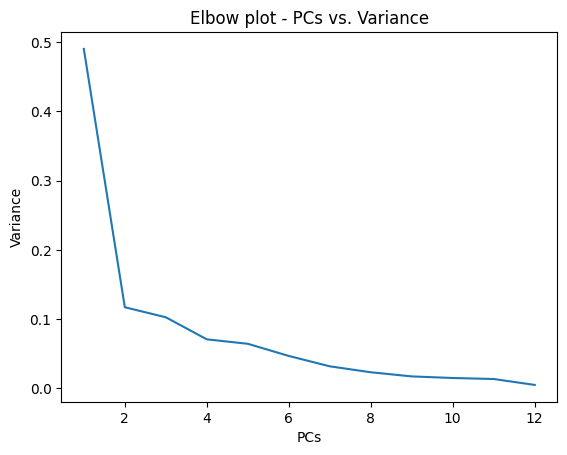

In [38]:
sb.lineplot(x = range(1, 13), y = pca_var)
plt.title('Elbow plot - PCs vs. Variance')
plt.xlabel('PCs')
plt.ylabel('Variance')

Comments:
- The first two PCs explain ~60% of the variation in the data.

##### Fit two PC's to the data

In [39]:
pca = PCA(n_components=2)

pca_fit = pca.fit_transform(X_train)


# Convert to DataFrame
df_pca = pd.DataFrame(pca_fit, 
                      columns=[f'PC{i+1}' for i in range(2)])



Visualise the PCs

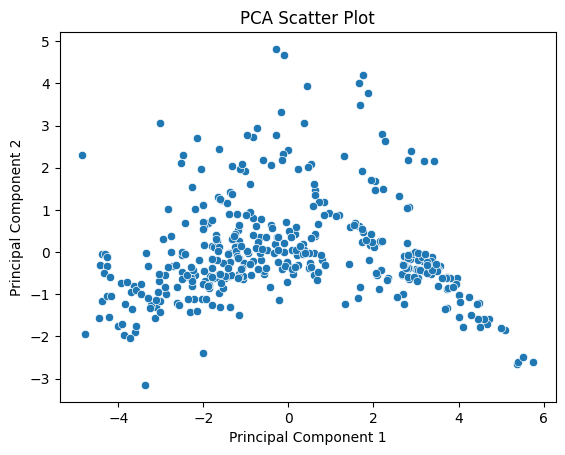

In [40]:
sb.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.show()

Comments: We could visualise the first two PCs on a scatter plot, but it is not interpretable.

Visualise the first two PCs with loading scores

In [41]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [42]:
fig = px.scatter(pca_fit, x=0, y=1, title="PCA Loadings - Boston housing",
                 labels={'0': 'PC1', '1': 'PC2'})

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

Analyse the PC scores/loadings

In [43]:
# print the scores
pd.DataFrame(loadings,
             index=features,
             columns=['PC1', 'PC2'])

,PC1,PC2
CRIM,0.646577,-0.343173
ZN,-0.658121,-0.293593
INDUS,0.853800,0.143122
CHAS,0.019649,0.702412
NOX,0.841981,0.263890
RM,-0.493296,0.344174
AGE,0.799205,0.305741
DIS,-0.808983,-0.378406
RAD,0.770654,-0.218669
TAX,0.817384,-0.196810


Comments:

PC1: represents spatial density and socio-economic factors
- Positive influence: INDUS, NOX, AGE, TAX, CRIM, RAD, LSTAT
- Negative influence: DIS, ZN, RM

PC2: represents lifestyle and liveability 
- Positive influence: CHAS,RM, INDUS, AGE
- Negative influence: CRIM, ZN, DIS, PTRATIO
